In [8]:
import cv2 as cv
import os
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np

In [2]:
datasetsPos = r'E:\GithubProjects\MukJumYee\datasets'

In [5]:
korsList = os.listdir(datasetsPos)
len(korsList)

2350

In [6]:
mapObj = { x:i for i, x in enumerate(korsList)}

def OneHotEncoding(data):
	ReturnObj = []

	ObjLen = len(mapObj)
	for label in data:
		temp = np.array([0. for _ in range(ObjLen)])
		temp[mapObj[label]] = 1.
		ReturnObj.append(temp)
	return np.array(ReturnObj)[0]

mapObjSwap = dict([(value, key) for key, value in mapObj.items()])

def OneHotDecoding(arr):
	maxPercent = 0
	result = "?"
	for i, percent in enumerate(arr):
		if percent > maxPercent:
			maxPercent = percent
			result = mapObjSwap[i]
	return (result, maxPercent)

In [33]:
trainX = []
trainY = []

folders = len(os.listdir(datasetsPos))
for i, folder in enumerate(os.listdir(datasetsPos)):
	topPos = f"{datasetsPos}/{folder}"
	y = OneHotEncoding(folder)
	for file in os.listdir(topPos):
		pos = f"{topPos}/{file}"
		# img = cv.imread(pos, cv.IMREAD_GRAYSCALE)
		img_array = np.fromfile(pos, np.uint8)
		img = cv.imdecode(img_array, cv.IMREAD_GRAYSCALE)
		trainX.append(img)
		trainY.append(y)
		print(f"{i+1} / {folders}  |  {pos}        ",end='\r')

In [34]:
trainX = np.array(trainX)
trainY = np.array(trainY)

In [35]:
trainX.shape, trainY.shape

((103400, 64, 64), (103400, 2350))

In [36]:
trainX = trainX.astype('float')/255

In [37]:
trainX

array([[[1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        ...,
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.]],

       [[1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        ...,
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.]],

       [[1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        ...,
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.]],

       ...,

       [[1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        ...,
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1.

In [38]:
trainY

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]])

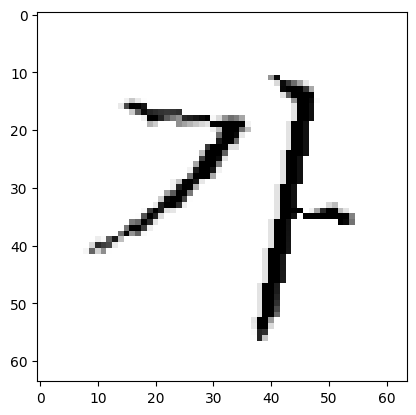

In [39]:
plt.imshow(trainX[0], cmap='gray')

In [40]:
OneHotDecoding(trainY[0])

('가', 1.0)

In [44]:
trainX.shape, trainY.shape

((103400, 64, 64), (103400, 2350))

In [45]:
trainX = trainX.reshape((103400, 64*64))

In [46]:
model = tf.keras.models.Sequential([
	tf.keras.layers.Dense(1024, activation = 'relu', input_shape = (64 * 64,)),
	tf.keras.layers.Dense(512, activation = 'relu',),
	tf.keras.layers.Dense(512, activation = 'relu',),
	tf.keras.layers.Dense(1024, activation = 'relu',),
	tf.keras.layers.Dense(2048, activation='relu'),
	tf.keras.layers.Dense(len(korsList), activation='softmax')
])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 1024)              4195328   
                                                                 
 dense_7 (Dense)             (None, 512)               524800    
                                                                 
 dense_8 (Dense)             (None, 512)               262656    
                                                                 
 dense_9 (Dense)             (None, 1024)              525312    
                                                                 
 dense_10 (Dense)            (None, 2048)              2099200   
                                                                 
 dense_11 (Dense)            (None, 2350)              4815150   
                                                                 
Total params: 12,422,446
Trainable params: 12,422,446


In [47]:
model.compile(
	optimizer = 'rmsprop',
	loss = 'categorical_crossentropy',
    metrics = ['accuracy']
)

In [48]:
model.fit(trainX, trainY, epochs = 100, batch_size=512)

Epoch 1/100
118/202 [================>.............] - ETA: 26s - loss: 7.9773 - accuracy: 2.1517e-04

KeyboardInterrupt: 